In [137]:
%load_ext ipydex.displaytools
import sympy as sp
from sympy import sin, cos
import symbtools as sb
sp.init_printing()

In [117]:
mh, mc, lh, lc, lp, dh, dc = sp.symbols('m_h, m_c, l_h, l_c, l_p, d_h, d_c')
mup, mue, mul = sp.symbols('\\mu_\\varphi, \\mu_\\varepsilon, \\mu_\\lambda')
phi, eps, lamb = sp.symbols('varphi, varepsilon, lambda')
dphi, deps, dlamb = sb.time_deriv(sp.Matrix([phi, eps, lamb]), [phi, eps, lamb])
t = sp.symbols('t')
g = sp.symbols('g')

x = sp.Matrix([phi, eps, lamb, dphi, deps, dlamb])

In [50]:
p_phi_1 = mh*(lp**2+dh**2)
p_eps_1 = mc*(lc**2+dc**2) + mh*(lh**2+dh**2) + mh*sin(phi)**2*(lp**2-dh**2)
p_lamb_1 = -dc**2*mc*cos(eps)**2-dc*lc*mc*sin(2*eps)-dh**2*mh*cos(eps)**2*cos(phi)**2+dh**2*mh - dh*lh*mh/2*(sin(2*eps-phi)+sin(2*eps+phi))+lc**2*mc*cos(eps)**2+lh**2*mh*cos(eps)**2+lp**2*mh*cos(eps)**2*cos(phi)**2-lp**2*mh*cos(eps)**2+lp**2*mh

p_phi_2 = - g*dh*mh*cos(eps)
p_eps_2 = g*(dc*mc - dh*mh*cos(phi))
p_eps_3 = g*(lh*mh - mc*lc)

In [69]:
p_phi_1 = sp.Symbol('p_{\\varphi,1}')
p_phi_2 = sp.Function('p_{\\varphi,2}')(eps)
p_eps_1 = sp.Function('p_{\\varepsilon,1}')(phi)
p_eps_2 = sp.Function('p_{\\varepsilon,2}')(phi)
p_eps_3 = sp.Symbol('p_{\\varepsilon,3}')
p_lamb_1 = sp.Function('p_{\\lambda,1}')(phi, eps)

In [92]:
p_phi_1 = sp.Symbol('p_{\\varphi,1}')
p_phi_2 = sp.Symbol('p_{\\varphi,2}')
p_eps_1 = sp.Symbol('p_{\\varepsilon,1}')
p_eps_2 = sp.Symbol('p_{\\varepsilon,2}')
p_eps_3 = sp.Symbol('p_{\\varepsilon,3}')
p_lamb_1 = sp.Symbol('p_{\\lambda,1}')

In [93]:
f = sp.Matrix([dphi, deps, dlamb, 
              -1/p_phi_1*(mup*dphi+p_phi_2*sin(phi)),
              -1/p_eps_1*(mue*deps+p_eps_2*sin(eps)+p_eps_3*cos(eps)),
              -mul/p_lamb_1*dlamb])

g1 = sp.Matrix([0, 0, 0, 0, lh*cos(phi)/p_eps_1, lh*sin(phi)*cos(eps)/p_lamb_1])
g2 = sp.Matrix([0, 0, 0, lp/p_phi_1, 0, -lp*sin(eps)/p_lamb_1])

In [144]:
f = sp.Matrix([dphi, deps, dlamb, 
              -1/p_phi_1*(mup*dphi+p_phi_2*sin(phi)),
              -1/p_eps_1*(mue*deps+p_eps_2*sin(eps)+p_eps_3*cos(eps)),
              -mul/p_lamb_1*dlamb])

g1 = sp.Matrix([0, 0, 0, 0, lh*cos(phi)/p_eps_1, lh*sin(phi)*cos(eps)/p_lamb_1])
g2 = sp.Matrix([0, 0, 0, lp/p_phi_1, 0, 0])

In [87]:
f = sp.Matrix([dphi, deps, dlamb,
               sp.Function('a')(phi, dphi, eps),
               sp.Function('b')(phi, eps, deps),
               sp.Function('c')(phi, eps, dlamb)])
g1 = sp.Matrix([0, 0, 0, 0,
               sp.Function('d')(phi),
               sp.Function('e')(phi, eps)])
g2 = sp.Matrix([0, 0, 0, sp.Symbol('f'), 0, sp.Function('g')(phi, eps)])

In [111]:
def calc_Gi(f, g1, g2, i):
    g1_cols = [sb.lie_bracket(f, g1, [phi, eps, lamb, dphi, deps, dlamb], order=k) for k in range(i+1)]
    g2_cols = [sb.lie_bracket(f, g2, [phi, eps, lamb, dphi, deps, dlamb], order=k) for k in range(i+1)]
    cols = [val for pair in zip(g1_cols, g2_cols) for val in pair]
    return sb.concat_cols(*cols)

In [145]:
Gis = [calc_Gi(f, g1, g2, i) for i in range(6)]
G5_rank = sb.generic_rank(Gis[5]) ##:
Gi_involutive = [sb.involutivity_test(Gis[i], x)[0] for i in range(5)] ##:

if G5_rank==6 and all(Gi_involutive):
    print("System IS input state linearizable")
else:
    print("System IS NOT input state linearizable")

---


Gi_involutive := [True, False, False, True, True]

---
System IS NOT input state linearizable


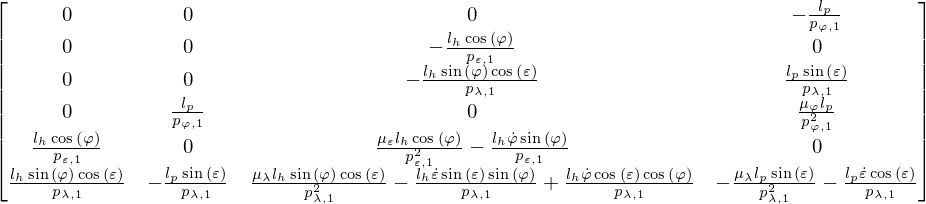

In [128]:
Gis[1]

In [129]:
sb.involutivity_test(Gis[1], x)

(False, (0, 2))

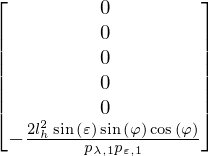

---


---


---


In [143]:
col1 = sb.col_select(Gis[1], 0)
col2 = sb.col_select(Gis[1], 2)
col_bracket = sb.lie_bracket(col1, col2, x) ##:

rank_G1 = sb.generic_rank(Gis[1]) ##:
G1_and_bracket = sb.concat_cols(G1, col_bracket)
rank_G1_and_bracket = sb.generic_rank(G1_and_bracket) ##: